# Credit Risk Evaluator

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [2]:
# Import the data
file_path = Path("Resources/lending_data.csv")
df= pd.read_csv(file_path)
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [15]:
df.count()

loan_size           77536
interest_rate       77536
borrower_income     77536
debt_to_income      77536
num_of_accounts     77536
derogatory_marks    77536
total_debt          77536
loan_status         77536
dtype: int64

## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

# I predict the Random Forest Classifer will perform better, due to the Random Forest Classifer algorithm provides accuracy at a higher level, than Logistic Regression 

## Split the Data into Training and Testing Sets

In [7]:
X = df.drop(columns=["loan_status"])
y = df["loan_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.head()


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
5540,9000.0,6.938,45900,0.346405,3,0,15900
1882,10900.0,7.751,53500,0.439252,5,1,23500
23752,9900.0,7.329,49600,0.395161,4,0,19600
18095,9000.0,6.934,45800,0.344978,3,0,15800
11550,9400.0,7.101,47400,0.367089,3,0,17400


In [3]:
# Split the data into X_train, X_test, y_train, y_test
# y = df["loan_size"]
# X = df.drop("loan_size", axis = 1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

In [8]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression
loan = LogisticRegression(solver='lbfgs', random_state=1)
loan.fit(X_train, y_train)
loan.score(X_test, y_test)


0.9914362360709864

In [9]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier
loan = RandomForestClassifier(random_state=1)
loan.fit(X_train, y_train)
loan.score(X_test, y_test)


0.9923132480396203

In [11]:
from sklearn.metrics import balanced_accuracy_score

y_pred = loan.predict(X_test)
balanced_accuracy_score(y_test, y_pred)


0.9572241390138799

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[18629,    96],
       [   53,   606]], dtype=int64)

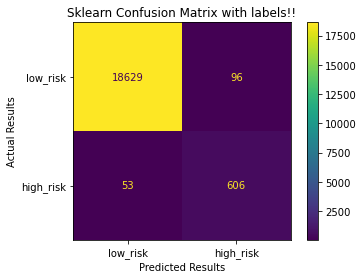

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['low_risk', 'high_risk'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels!!', 
                xlabel='Predicted Results', 
                ylabel='Actual Results')
plt.show()


# *Which model performed better? The Random Forest Classifer performed better.  How does that compare to your prediction? My prediction was correct 